<a href="https://colab.research.google.com/github/aishwary247/ML/blob/main/LinearReg(GradientDescent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_X = pd.read_csv("/content/linearX.csv")
df_y = pd.read_csv("/content/linearY.csv")

In [ ]:
print(df_X.head())
print(df_y.head())

   9.1
0  8.0
1  9.1
2  8.4
3  6.9
4  7.7
   0.99523
0  0.99007
1  0.99769
2  0.99386
3  0.99508
4  0.99630


In [ ]:
x = df_X.to_numpy()
y = df_y.to_numpy()

In [ ]:
x.shape, y.shape

((99, 1), (99, 1))

In [ ]:
m = x.shape[0]
ones = np.ones(m).reshape(-1,1)
X = np.hstack((ones,x))
X.shape

(99, 2)

In [ ]:
X[:5]

array([[1. , 8. ],
       [1. , 9.1],
       [1. , 8.4],
       [1. , 6.9],
       [1. , 7.7]])

In [ ]:
def cost_function(theta,X,y):
  m = X.shape[0]
  err = y - np.matmul(X,theta)
  return (np.dot(np.transpose(err), err)/(2*m))[0][0]

In [ ]:
def gradient(theta,X,y):
  m = X.shape[0]
  return np.matmul(np.transpose(X), (np.matmul(X,theta)-y))/(m)

In [ ]:
cost_list = np.array([])
theta0_list = np.array([])
theta1_list = np.array([])

def gradient_descent(theta,X,y,lr):
  global cost_list, theta0_list, theta1_list  # Declare variables as global

  epoch = 0
  while True :

    cost = cost_function(theta,X,y)
    # print(" epoch "+ str(epoch ), end = " ")
    # print(cost)
    cost_list= np.append(cost_list, cost)

    theta = theta - (lr)*gradient(theta,X,y)
    theta0_list = np.append(theta0_list, theta[0][0])
    theta1_list = np.append(theta1_list, theta[1][0])

    cost_new = cost_function(theta,X,y)
    epoch += 1
    if abs(cost_new-cost) <= 1e-10 :
      break
    # elif epoch == max_epoch :
    #   break

    cost = cost_new

  return theta, cost_list

In [ ]:
theta = np.array([[0],
                  [0]])

In [ ]:
theta_final, cost_list = gradient_descent(theta,X,y,0.01)

In [ ]:
theta_final

array([[0.98802495],
       [0.00105694]])

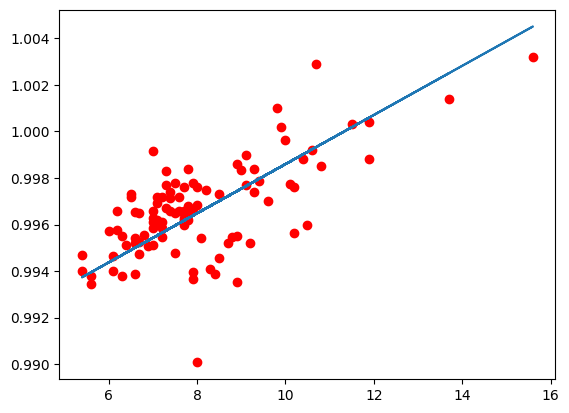

In [ ]:
plt.plot(x,y, 'ro')
plt.plot(x, theta_final[0]+theta_final[1]*x)